In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.formula.api import ols
from sklearn import preprocessing
import statsmodels.api as sm
# import rpy2.robjects.numpy2ri
# from rpy2.robjects.packages import importr
import matplotlib.pyplot as plt

# Задание 1

In [2]:
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 2000)

table = pd.read_csv("2016-FCC-New-Coders-Survey-Data.csv", sep=",", 
                    dtype = {'CodeEventOther': str,
                             'JobRoleInterestOther': str})
pd.to_numeric(table['Income'], errors = 'coerce')

0        32000.0
1        15000.0
2        48000.0
3        43000.0
4         6000.0
          ...   
15615    10000.0
15616    10000.0
15617    48000.0
15618    10000.0
15619    18000.0
Name: Income, Length: 15620, dtype: float64

In [3]:
table = table.loc[:, ['CityPopulation', 'EmploymentStatus', 'Gender','HasDebt', 'JobPref', 'JobWherePref', 'MaritalStatus', 'Income', 'SchoolDegree']]
table

,CityPopulation,EmploymentStatus,Gender,HasDebt,JobPref,JobWherePref,MaritalStatus,Income,SchoolDegree
0,"between 100,000 and 1 million",Employed for wages,male,1.0,freelance,NaN,married or domestic partnership,32000.0,"some college credit, no degree"
1,"between 100,000 and 1 million",Employed for wages,male,0.0,work for a startup,in an office with other developers,NaN,15000.0,"some college credit, no degree"
2,more than 1 million,Employed for wages,male,0.0,start your own business,NaN,NaN,48000.0,high school diploma or equivalent (GED)
3,more than 1 million,Employed for wages,female,1.0,work for a startup,from home,NaN,43000.0,bachelor's degree
4,"between 100,000 and 1 million",Employed for wages,female,1.0,work for a medium-sized company,in an office with other developers,NaN,6000.0,"some college credit, no degree"
...,...,...,...,...,...,...,...,...,...
15615,more than 1 million,Self-employed freelancer,male,1.0,start your own business,NaN,"single, never married",10000.0,bachelor's degree
15616,more than 1 million,Employed for wages,male,0.0,work for a startup,in an office with other developers,"single, never married",10000.0,bachelor's degree
15617,more than 1 million,Self-employed freelancer,male,0.0,freelance,NaN,NaN,48000.0,bachelor's degree
15618,more than 1 million,Self-employed freelancer,male,0.0,NaN,NaN,NaN,10000.0,master's degree (non-professional)


In [4]:
table2 = table.dropna()
table2 = table2[(table2['Gender'] == 'male') | (table2['Gender'] == 'female')]
table2

,CityPopulation,EmploymentStatus,Gender,HasDebt,JobPref,JobWherePref,MaritalStatus,Income,SchoolDegree
20,more than 1 million,Employed for wages,female,1.0,work for a medium-sized company,in an office with other developers,married or domestic partnership,200000.0,master's degree (non-professional)
36,"between 100,000 and 1 million",Self-employed freelancer,male,1.0,work for a medium-sized company,in an office with other developers,married or domestic partnership,60000.0,high school diploma or equivalent (GED)
59,more than 1 million,Employed for wages,male,1.0,work for a medium-sized company,in an office with other developers,married or domestic partnership,35000.0,"some college credit, no degree"
71,more than 1 million,Employed for wages,male,1.0,work for a multinational corporation,from home,married or domestic partnership,56000.0,"some college credit, no degree"
72,"less than 100,000",Employed for wages,male,1.0,work for a medium-sized company,from home,married or domestic partnership,35000.0,bachelor's degree
...,...,...,...,...,...,...,...,...,...
15564,"less than 100,000",Employed for wages,male,1.0,work for a medium-sized company,in an office with other developers,married or domestic partnership,200000.0,"professional degree (MBA, MD, JD, etc.)"
15566,more than 1 million,Employed for wages,male,0.0,work for a startup,no preference,married or domestic partnership,200000.0,bachelor's degree
15584,more than 1 million,Employed for wages,male,1.0,work for a multinational corporation,in an office with other developers,married or domestic partnership,200000.0,bachelor's degree
15598,"less than 100,000",Employed for wages,male,1.0,work for a medium-sized company,from home,married or domestic partnership,200000.0,associate's degree


In [5]:
table2['SchoolDegree'].unique()

array(["master's degree (non-professional)",
       'high school diploma or equivalent (GED)',
       'some college credit, no degree', "bachelor's degree",
       'professional degree (MBA, MD, JD, etc.)',
       'trade, technical, or vocational training', "associate's degree",
       'Ph.D.', 'some high school', 'no high school (secondary school)'],
      dtype=object)

In [6]:
table2_1=table2[table2['SchoolDegree'] == 'master\'s degree (non-professional)']['Income']
table2_2=table2[table2['SchoolDegree'] == 'high school diploma or equivalent (GED)']['Income']
table2_3=table2[table2['SchoolDegree'] == 'some college credit, no degree']['Income']
table2_4=table2[table2['SchoolDegree'] == 'bachelor\'s degree']['Income']
table2_5=table2[table2['SchoolDegree'] == 'professional degree (MBA, MD, JD, etc.)']['Income']
table2_6=table2[table2['SchoolDegree'] == 'trade, technical, or vocational training']['Income']
table2_7=table2[table2['SchoolDegree'] == 'associate\'s degree']['Income']
table2_8=table2[table2['SchoolDegree'] == 'Ph.D.']['Income']
table2_9=table2[table2['SchoolDegree'] == 'some high school']['Income']
table2_10=table2[table2['SchoolDegree'] == 'no high school (secondary school)']['Income']

## Проверка на нормальность

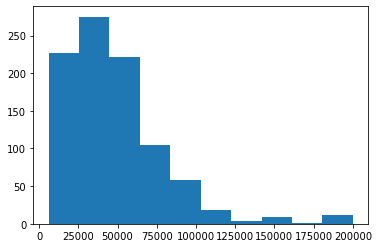

In [7]:
plot = plt.hist(table2['Income'])

In [8]:
stats.shapiro(table2['Income'])

ShapiroResult(statistic=0.8556973934173584, pvalue=2.449250369630941e-28)

## Проверка на гомоскедастичность

In [9]:
stats.levene(table2_1, table2_2, table2_3, table2_4, table2_5, table2_6, table2_7, table2_8, table2_9, table2_10)

LeveneResult(statistic=2.915459951330675, pvalue=0.0020659661924430123)

## Обобщенный тест

In [10]:
model = ols('Income ~ C(SchoolDegree)', table2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.442
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           0.000348
Time:                        12:37:16   Log-Likelihood:                -10971.
No. Observations:                 931   AIC:                         2.196e+04
Df Residuals:                     921   BIC:                         2.201e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

## Трансформация (лог)

                            OLS Regression Results                            
Dep. Variable:                Income1   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     4.588
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           6.05e-06
Time:                        12:37:16   Log-Likelihood:                -969.15
No. Observations:                 931   AIC:                             1958.
Df Residuals:                     921   BIC:                             2007.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

ShapiroResult(statistic=0.9735249876976013, pvalue=5.58358003929782e-12)

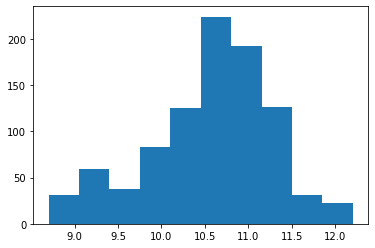

In [11]:
table2['Income1'] = table2[['Income']].applymap(lambda x: np.log(x+1))
model = ols('Income1 ~ C(SchoolDegree)', table2).fit()
print(model.summary())
plot = plt.hist(table2['Income1'])
stats.shapiro(table2['Income1'])

## Трансформация (корень квадратный)

                            OLS Regression Results                            
Dep. Variable:                Income1   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.995
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           5.06e-05
Time:                        12:37:16   Log-Likelihood:                -5242.4
No. Observations:                 931   AIC:                         1.050e+04
Df Residuals:                     921   BIC:                         1.055e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

ShapiroResult(statistic=0.9709372520446777, pvalue=1.1025697499097986e-12)

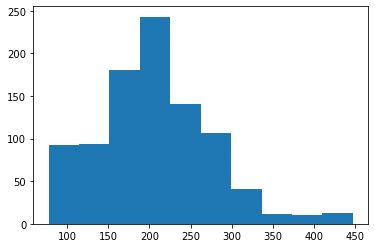

In [12]:
table2['Income1'] = table2[['Income']].applymap(lambda x: x**(1/2))
model = ols('Income1 ~ C(SchoolDegree)', table2).fit()
print(model.summary())
plot = plt.hist(table2['Income1'])
stats.shapiro(table2['Income1'])

## Трансформация (корень кубический)

                            OLS Regression Results                            
Dep. Variable:                Income1   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     4.194
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           2.49e-05
Time:                        12:37:17   Log-Likelihood:                -3206.6
No. Observations:                 931   AIC:                             6433.
Df Residuals:                     921   BIC:                             6482.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

ShapiroResult(statistic=0.985568642616272, pvalue=6.038912658823392e-08)

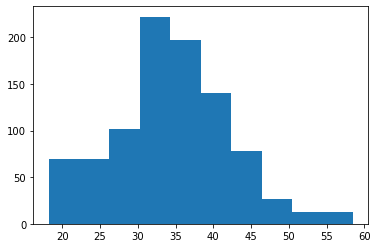

In [13]:
table2['Income1'] = table2[['Income']].applymap(lambda x: x**(1/3))
model = ols('Income1 ~ C(SchoolDegree)', table2).fit()
print(model.summary())
plot = plt.hist(table2['Income1'])
stats.shapiro(table2['Income1'])

## Трансформация (обратные величины)

                            OLS Regression Results                            
Dep. Variable:                Income1   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     5.277
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           4.89e-07
Time:                        12:37:17   Log-Likelihood:                 8383.9
No. Observations:                 931   AIC:                        -1.675e+04
Df Residuals:                     921   BIC:                        -1.670e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

ShapiroResult(statistic=0.7213217616081238, pvalue=1.0208053496571024e-36)

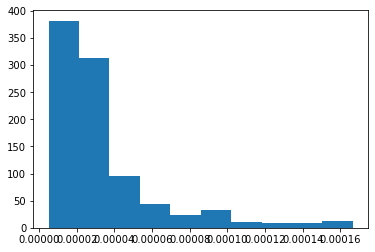

In [14]:
table2['Income1'] = table2[['Income']].applymap(lambda x: 1/x)
model = ols('Income1 ~ C(SchoolDegree)', table2).fit()
print(model.summary())
plot = plt.hist(table2['Income1'])
stats.shapiro(table2['Income1'])

## Уменьшаем выборку

In [15]:
table2 = table2.head(100)

In [16]:
table2

,CityPopulation,EmploymentStatus,Gender,HasDebt,JobPref,JobWherePref,MaritalStatus,Income,SchoolDegree,Income1
20,more than 1 million,Employed for wages,female,1.0,work for a medium-sized company,in an office with other developers,married or domestic partnership,200000.0,master's degree (non-professional),0.000005
36,"between 100,000 and 1 million",Self-employed freelancer,male,1.0,work for a medium-sized company,in an office with other developers,married or domestic partnership,60000.0,high school diploma or equivalent (GED),0.000017
59,more than 1 million,Employed for wages,male,1.0,work for a medium-sized company,in an office with other developers,married or domestic partnership,35000.0,"some college credit, no degree",0.000029
71,more than 1 million,Employed for wages,male,1.0,work for a multinational corporation,from home,married or domestic partnership,56000.0,"some college credit, no degree",0.000018
72,"less than 100,000",Employed for wages,male,1.0,work for a medium-sized company,from home,married or domestic partnership,35000.0,bachelor's degree,0.000029
...,...,...,...,...,...,...,...,...,...,...
1335,"between 100,000 and 1 million",Employed for wages,female,1.0,work for a medium-sized company,in an office with other developers,married or domestic partnership,36000.0,bachelor's degree,0.000028
1345,"between 100,000 and 1 million",Employed for wages,male,1.0,work for a multinational corporation,no preference,married or domestic partnership,86000.0,master's degree (non-professional),0.000012
1352,"between 100,000 and 1 million",Employed for wages,male,0.0,work for a medium-sized company,in an office with other developers,married or domestic partnership,8000.0,master's degree (non-professional),0.000125
1360,more than 1 million,Employed for wages,male,1.0,work for a startup,in an office with other developers,married or domestic partnership,20000.0,"professional degree (MBA, MD, JD, etc.)",0.000050


In [17]:
table2_1=table2[table2['SchoolDegree'] == 'master\'s degree (non-professional)']['Income']
table2_2=table2[table2['SchoolDegree'] == 'high school diploma or equivalent (GED)']['Income']
table2_3=table2[table2['SchoolDegree'] == 'some college credit, no degree']['Income']
table2_4=table2[table2['SchoolDegree'] == 'bachelor\'s degree']['Income']
table2_5=table2[table2['SchoolDegree'] == 'professional degree (MBA, MD, JD, etc.)']['Income']
table2_6=table2[table2['SchoolDegree'] == 'trade, technical, or vocational training']['Income']
table2_7=table2[table2['SchoolDegree'] == 'associate\'s degree']['Income']
table2_8=table2[table2['SchoolDegree'] == 'Ph.D.']['Income']
table2_9=table2[table2['SchoolDegree'] == 'some high school']['Income']
table2_10=table2[table2['SchoolDegree'] == 'no high school (secondary school)']['Income']

ShapiroResult(statistic=0.8403542041778564, pvalue=5.3046971260073406e-09)
--------------------------------------------
LeveneResult(statistic=0.8097008133358762, pvalue=0.6084740533103024)
--------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.4561
Date:                Thu, 09 Dec 2021   Prob (F-statistic):              0.900
Time:                        12:37:18   Log-Likelihood:                -1182.7
No. Observations:                 100   AIC:                             2385.
Df Residuals:                      90   BIC:                             2411.
Df Model:                           9                                         
Covariance Type:            nonrobust                 

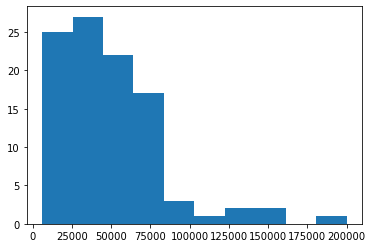

In [18]:
plot = plt.hist(table2['Income'])
print(stats.shapiro(table2['Income']))
print('--------------------------------------------')
print(stats.levene(table2_1, table2_2, table2_3, table2_4, table2_5, table2_6, table2_7, table2_8, table2_9, table2_10))
print('--------------------------------------------')
model = ols('Income ~ C(SchoolDegree)', table2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Income1   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.6649
Date:                Thu, 09 Dec 2021   Prob (F-statistic):              0.738
Time:                        12:37:18   Log-Likelihood:                -103.19
No. Observations:                 100   AIC:                             226.4
Df Residuals:                      90   BIC:                             252.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

<ipython-input-19-de7516e53d35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table2['Income1'] = table2[['Income']].applymap(lambda x: np.log(x+1))


ShapiroResult(statistic=0.9772990345954895, pvalue=0.08171311020851135)

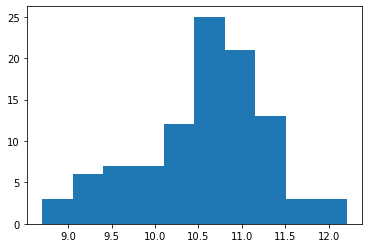

In [19]:
table2['Income1'] = table2[['Income']].applymap(lambda x: np.log(x+1))
model = ols('Income1 ~ C(SchoolDegree)', table2).fit()
print(model.summary())
plot = plt.hist(table2['Income1'])
stats.shapiro(table2['Income1'])

In [20]:
stats.f_oneway(table2_1, table2_2, table2_3, table2_4, table2_5, table2_6, table2_7, table2_8, table2_9, table2_10)

F_onewayResult(statistic=0.4561282346390862, pvalue=0.8999913422320907)

In [21]:
# plt.ylim(0, 100000)
# plt.boxplot((table2_1, table2_2, table2_3, table2_4, table2_5, table2_6, table2_7, table2_8, table2_9, table2_10), labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
# plt.show()

## Многофакторный дисперсионный анализ

In [22]:
model = ols('Income1 ~ C(CityPopulation) + C(EmploymentStatus) + C(Gender) + C(HasDebt) + C(JobPref) + C(JobWherePref) + C(MaritalStatus) + C(Gender)*C(MaritalStatus)', table2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Income1   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.7921
Date:                Thu, 09 Dec 2021   Prob (F-statistic):              0.675
Time:                        12:37:18   Log-Likelihood:                -100.27
No. Observations:                 100   AIC:                             230.5
Df Residuals:                      85   BIC:                             269.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [23]:
an_res1 = sm.stats.anova_lm(model, typ=1)
an_res2 = sm.stats.anova_lm(model, typ=2)
an_res3 = sm.stats.anova_lm(model, typ=3)
print(an_res1)
print(an_res2)
print(an_res3)

                              df     sum_sq   mean_sq         F    PR(>F)
C(CityPopulation)            2.0   1.062998  0.531499  1.038529  0.358422
C(EmploymentStatus)          2.0   2.005443  1.002721  1.959281  0.147274
C(Gender)                    1.0   0.033895  0.033895  0.066230  0.797529
C(HasDebt)                   1.0   0.846599  0.846599  1.654224  0.201877
C(JobPref)                   2.0   0.962906  0.481453  0.940741  0.394364
C(JobWherePref)              2.0   0.254478  0.127239  0.248620  0.780441
C(MaritalStatus)             2.0   0.125622  0.062811  0.122731  0.884658
C(Gender):C(MaritalStatus)   2.0   0.383587  0.191794  0.374758  0.688586
Residual                    85.0  43.501332  0.511780       NaN       NaN
                               sum_sq    df         F    PR(>F)
C(CityPopulation)            0.774923   2.0  0.757086  0.472167
C(EmploymentStatus)          2.413935   2.0  2.358370  0.100735
C(Gender)                    0.095037   1.0  0.185699  0.667611
C(Ha

# Задание 2

In [24]:
task2_table = pd.read_excel('data.xlsx')

In [25]:
task2_table


,Date,brent_price,wheat_price,fuel_rus_price,interest_rate_rus,ruble,infl_rus,fuel_can_price,interest_rate_can,can_dollar,infl_can
0,2021-10-01,83.5625,745.30,0.72,6.75,0.013996,8.1,1.22,0.25,1.243705,4.7
1,2021-09-01,74.2875,711.70,0.68,6.75,0.013712,7.4,1.13,0.25,1.267282,4.4
2,2021-08-01,70.6250,720.65,0.68,6.50,0.013590,6.7,1.10,0.25,1.259659,4.1
3,2021-07-01,74.2500,679.60,0.67,5.50,0.013534,6.5,1.13,0.25,1.251650,3.7
4,2021-06-01,73.1925,664.10,0.68,5.50,0.013771,6.5,1.12,0.25,1.222568,3.1
5,2021-05-01,68.2100,708.60,0.67,5.00,0.013513,6.0,1.11,0.25,1.211967,3.6
6,2021-04-01,65.3900,648.30,0.64,4.50,0.013133,5.5,1.06,0.25,1.249259,3.4
7,2021-03-01,64.9625,641.50,0.64,4.25,0.013441,5.8,0.99,0.25,1.256935,2.2
8,2021-02-01,62.9100,649.90,0.65,4.25,0.013456,5.7,0.97,0.25,1.269340,1.1
9,2021-01-01,55.4850,653.80,0.63,4.25,0.013442,5.2,0.89,0.25,1.271819,1.0


In [26]:
def to_nominale(ser):
    low = ser.min()
    high = ser.max()
    new_ser = []
    bounds = [low+((high-low)/5)*i for i in range(5)]
    for val in ser:
        if val>=bounds[0] and val<bounds[1]:
            new_ser.append('very low')
        elif val>=bounds[1] and val<bounds[2]:
            new_ser.append('low')
        elif val>=bounds[2] and val<bounds[3]:
            new_ser.append('medium')
        elif val>=bounds[3] and val<bounds[4]:
            new_ser.append('high')
        else:
            new_ser.append('very high')
    return new_ser

In [27]:
task2_table['brent_price']=to_nominale(task2_table['brent_price'])
task2_table['wheat_price']=to_nominale(task2_table['wheat_price'])
task2_table['fuel_rus_price']=to_nominale(task2_table['fuel_rus_price'])
task2_table['fuel_can_price']=to_nominale(task2_table['fuel_can_price'])
task2_table['ruble']=to_nominale(task2_table['ruble'])
task2_table['can_dollar']=to_nominale(task2_table['can_dollar'])
# task2_table['interest_rate_rus']=to_nominale(task2_table['interest_rate_rus'])
# task2_table['interest_rate_can']=to_nominale(task2_table['interest_rate_can'])

In [28]:
task2_table

,Date,brent_price,wheat_price,fuel_rus_price,interest_rate_rus,ruble,infl_rus,fuel_can_price,interest_rate_can,can_dollar,infl_can
0,2021-10-01,very high,very high,very high,6.75,low,8.1,very high,0.25,very low,4.7
1,2021-09-01,very high,very high,high,6.75,low,7.4,very high,0.25,low,4.4
2,2021-08-01,high,very high,high,6.50,low,6.7,very high,0.25,low,4.1
3,2021-07-01,very high,high,high,5.50,very low,6.5,very high,0.25,low,3.7
4,2021-06-01,very high,high,high,5.50,low,6.5,very high,0.25,very low,3.1
5,2021-05-01,high,very high,high,5.00,very low,6.0,very high,0.25,very low,3.6
6,2021-04-01,high,high,medium,4.50,very low,5.5,high,0.25,very low,3.4
7,2021-03-01,high,high,medium,4.25,very low,5.8,high,0.25,low,2.2
8,2021-02-01,high,high,medium,4.25,very low,5.7,high,0.25,low,1.1
9,2021-01-01,medium,high,low,4.25,very low,5.2,medium,0.25,low,1.0


# Россия

## Проверка на нормальность

ShapiroResult(statistic=0.9752046465873718, pvalue=0.5834289789199829)

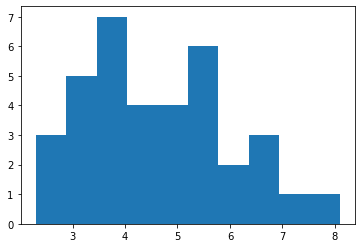

In [29]:
plot = plt.hist(task2_table['infl_rus'])
stats.shapiro(task2_table['infl_rus'])

In [30]:
model = ols('infl_rus ~ C(brent_price) + C(wheat_price) + C(interest_rate_rus) + C(fuel_rus_price) + C(ruble)', task2_table).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               infl_rus   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     27.61
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           2.70e-06
Time:                        12:37:21   Log-Likelihood:                 13.489
No. Observations:                  36   AIC:                             25.02
Df Residuals:                      10   BIC:                             66.19
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [31]:
# task2_table['infl_rus'] = task2_table[['infl_rus']].applymap(lambda x: np.log(x+1))
# plot = plt.hist(task2_table['infl_rus'])
# stats.shapiro(task2_table['infl_rus'])

In [32]:
an_res1 = sm.stats.anova_lm(model, typ=1)
an_res2 = sm.stats.anova_lm(model, typ=2)
an_res3 = sm.stats.anova_lm(model, typ=3)
print(an_res1)
print(an_res2)
print(an_res3)

                        df     sum_sq    mean_sq           F        PR(>F)
C(brent_price)         4.0  40.545704  10.136426  101.746199  4.664263e-08
C(wheat_price)         4.0  15.789395   3.947349   39.622222  4.200159e-06
C(interest_rate_rus)  11.0  11.661333   1.060121   10.641157  4.020547e-04
C(fuel_rus_price)      4.0   0.145342   0.036335    0.364724  8.283671e-01
C(ruble)               4.0   0.722420   0.180605    1.812854  2.029897e-01
Residual              10.0   0.996246   0.099625         NaN           NaN
                        sum_sq    df         F    PR(>F)
C(brent_price)        1.996071   4.0  5.008981  0.017734
C(wheat_price)        2.730938   4.0  6.853070  0.006363
C(interest_rate_rus)  8.496432  11.0  7.753133  0.001525
C(fuel_rus_price)     0.222477   4.0  0.558287  0.698177
C(ruble)              1.203022   4.0  3.018887  0.071242
Residual              0.996246  10.0       NaN       NaN
                        sum_sq    df          F    PR(>F)
Intercept         

# Канада

## Проверка на нормальность

ShapiroResult(statistic=0.9621917009353638, pvalue=0.2509593963623047)

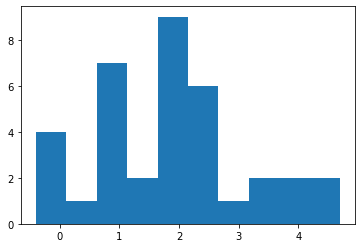

In [33]:
plot = plt.hist(task2_table['infl_can'])
stats.shapiro(task2_table['infl_can'])

In [34]:
model = ols('infl_can ~ C(brent_price) + C(wheat_price) + C(interest_rate_can) + C(fuel_can_price) + C(can_dollar)', task2_table).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               infl_can   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     13.59
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           5.47e-07
Time:                        12:37:21   Log-Likelihood:                -11.669
No. Observations:                  36   AIC:                             59.34
Df Residuals:                      18   BIC:                             87.84
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [35]:
# task2_table['infl_can'] = task2_table[['infl_can']].applymap(lambda x: np.log(x+1))
# plot = plt.hist(task2_table['infl_can'])
# stats.shapiro(task2_table['infl_can'])

In [36]:
an_res1 = sm.stats.anova_lm(model, typ=1)
an_res2 = sm.stats.anova_lm(model, typ=2)
an_res3 = sm.stats.anova_lm(model, typ=3)
print(an_res1)
print(an_res2)
print(an_res3)

                        df     sum_sq    mean_sq          F        PR(>F)
C(brent_price)         4.0  41.463651  10.365913  46.291991  3.095049e-09
C(wheat_price)         4.0   6.962333   1.740583   7.773080  8.024381e-04
C(interest_rate_can)   3.0   2.216011   0.738670   3.298747  4.414161e-02
C(fuel_can_price)      4.0   0.678730   0.169682   0.757766  5.660866e-01
C(can_dollar)          4.0   0.925998   0.231499   1.033828  4.169074e-01
Residual              18.0   4.030642   0.223925        NaN           NaN
                        sum_sq    df         F    PR(>F)
C(brent_price)        0.892019   4.0  0.995893  0.435177
C(wheat_price)        1.868592   4.0  2.086185  0.124955
C(interest_rate_can)  4.105837   3.0  6.111935  0.004709
C(fuel_can_price)     0.601474   4.0  0.671514  0.620212
C(can_dollar)         1.341964   4.0  1.498233  0.244523
Residual              4.030642  18.0       NaN       NaN
                        sum_sq    df          F    PR(>F)
Intercept             5.7